Muhammad Hassaan Azam

AI/ML Intern

DHC 831


# Skin Cancer Detection

**Skin Cancer Detection Using Image Classification**

Skin cancer is the most common human malignancy, primarily diagnosed through visual examination, starting with an initial clinical screening. This process may involve dermoscopic analysis, a biopsy, and subsequent histopathological examination. However, automating the classification of skin lesions using images poses a significant challenge due to the fine-grained variability in the appearance of skin lesions.

**Dataset Overview:**

The dataset used for this task is sourced from the ISIC (International Skin Image Collaboration) Archive. It contains:

* 1800 images of benign moles

* 1497 images of malignant moles


The images have been resized to a low resolution of 224x224x3 (RGB) for processing.

**Objective:**
The goal is to develop a machine learning model capable of accurately classifying moles into one of the following categories:

1. **Benign**

2. **Malignant**

This project aims to contribute to the field of automated skin cancer detection, offering a potentially faster and more accurate method for early diagnosis.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

Importing kagglehub so we can download data direct from kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fanconic/skin-cancer-malignant-vs-benign")

print("Path to dataset files:", path)

100%|██████████| 325M/325M [00:01<00:00, 175MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4


In [ ]:
import os


Skin_img = tf.io.gfile.glob(str(path + '/data/train/*/*'))
# Skin_img.extend(tf.io.gfile.glob(str(path + '/data/val/*/*')))
Skin_img.extend(tf.io.gfile.glob(str(path + '/data/test/*/*')))
# Print the paths of the first few images
# print(Skin_img)
for imgname in Skin_img[:3]:
    print(imgname)

/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/train/benign/143.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/train/benign/456.jpg
/root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4/data/train/benign/252.jpg


## Analyzing the Dataset

Total image count in training and testing datasets.

In [ ]:
train_data = []
test_data = []

for img_path in Skin_img:
    if 'train' in img_path:
        train_data.append(img_path)
    elif 'test' in img_path:
        test_data.append(img_path)

print(f"Total Training Data Images: {len(train_data)}")
print(f"Total Testing Data Images: {len(test_data)}")
print(f"Sum of Training and Testing Images: {len(train_data)+len(test_data)}")

Total Training Data Images: 2637
Total Testing Data Images: 660
Sum of Training and Testing Images: 3297


Data distribution in Training and Testing percentage

In [ ]:
total_images = len(train_data) + len(test_data)
train_percent = (len(train_data) / total_images) * 100
test_percent = (len(test_data) / total_images) * 100

print(f"Train data: {train_percent:.2f}%")
print(f"Test data: {test_percent:.2f}%")

Train data: 79.98%
Test data: 20.02%


Number of Images in each class in Training and Testing data

In [ ]:
import os

train_benign = []
train_malignant = []
test_benign = []
test_malignant = []

for img in train_data:
    if 'benign' in os.path.basename(os.path.dirname(img)):
        train_benign.append(img)
    elif 'malignant' in os.path.basename(os.path.dirname(img)):
        train_malignant.append(img)

for img in test_data:
    if 'benign' in os.path.basename(os.path.dirname(img)):
        test_benign.append(img)
    elif 'malignant' in os.path.basename(os.path.dirname(img)):
        test_malignant.append(img)

print(f"Number of Images of Benign Class in Training Data: {len(train_benign)}")
print(f"Number of Images of Malignant Class in Training Data: {len(train_malignant)}")
print(f"Number of Images of Benign Class in Testing Data: {len(test_benign)}")
print(f"Number of Images of Maligant Class in Testing Data: {len(test_malignant)}")

Number of Images of Benign Class in Training Data: 1440
Number of Images of Malignant Class in Training Data: 1197
Number of Images of Benign Class in Testing Data: 360
Number of Images of Maligant Class in Testing Data: 300


## Plotting Benign and Malignant Class Images Side by Side

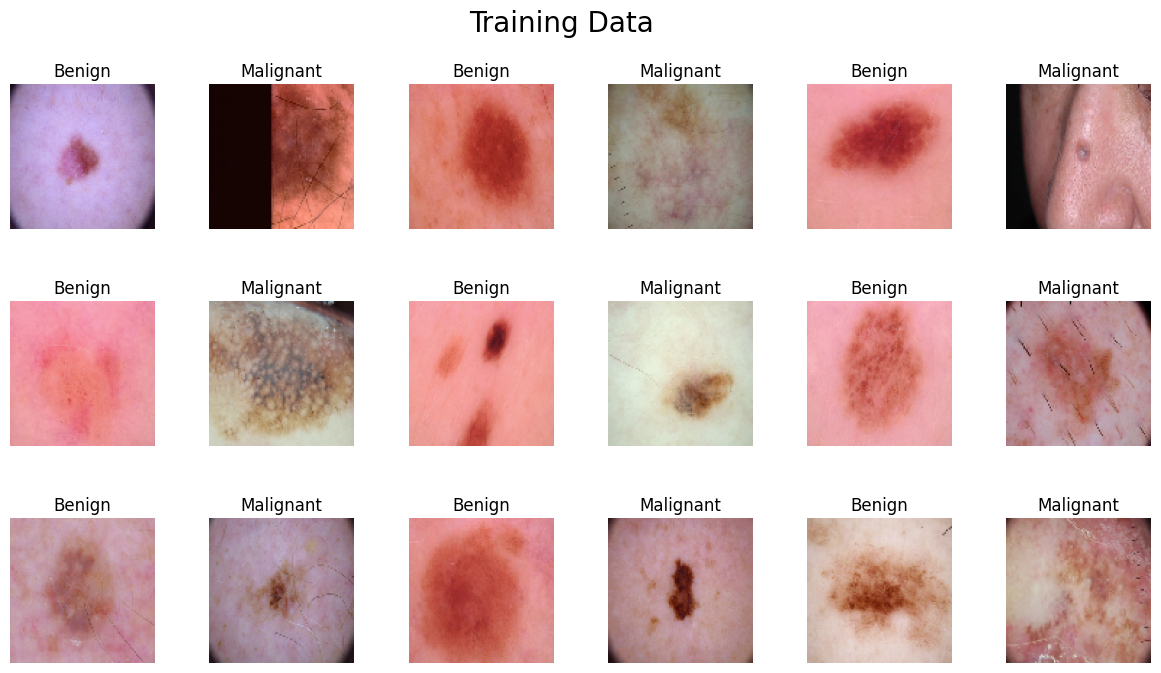

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image

# Assuming train_benign and train_malignant are lists of image paths
some_train_benign = np.random.randint(0, len(train_benign), 9)
some_train_malignant = np.random.randint(0, len(train_malignant), 9)

plt.figure(figsize=(15, 15))

# Adjust subplot parameters to provide more space for titles
plt.subplots_adjust(hspace=0.5, top=0.93)  # Adjust top to make space for the main title

# Add main title
plt.suptitle('Training Data', fontsize=20)

s = 0
for num in some_train_benign:
    img = image.load_img(train_benign[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Benign')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_train_malignant:
    img = image.load_img(train_malignant[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Malignant')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()


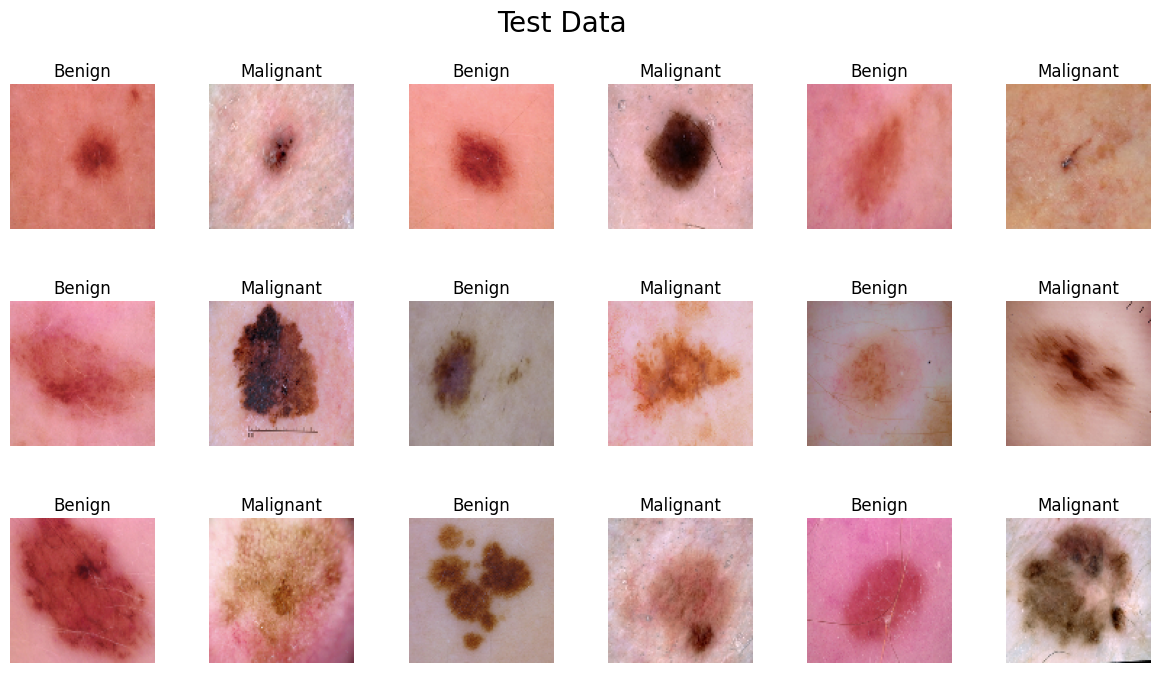

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.utils as image

# Assuming test_benign and test_malignant are lists of image paths
some_test_benign = np.random.randint(0, len(test_benign), 9)
some_test_malignant = np.random.randint(0, len(test_malignant), 9)

plt.figure(figsize=(15, 15))

# Adjust subplot parameters to provide more space for titles
plt.subplots_adjust(hspace=0.5, top=0.93)  # Adjust top to make space for the main title

# Add main title
plt.suptitle('Test Data', fontsize=20)

s = 0
for num in some_test_benign:
    img = image.load_img(test_benign[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Benign')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_test_malignant:
    img = image.load_img(test_malignant[num], target_size=(100, 100))
    img = image.img_to_array(img)

    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Malignant')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()


## Preprocessing Images

In [ ]:

import cv2
import numpy as np
import random
import tensorflow as tf

# Function to preprocess images
def preprocess_image(img_path):
    # Read the image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    # Resize the image
    img_size = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
    # Convert to grayscale
    img_gray = cv2.cvtColor(img_size, cv2.COLOR_BGR2GRAY)
    # Convert to tensor
    img_tensor = tf.convert_to_tensor(img_gray, dtype=tf.float32)
    # Normalize the image
    # img_tensor = tf.image.per_image_standardization(img_tensor)
    return img_tensor

We are preprocessing training images using the defined preprocess function and assigning labels to the classes.

In [ ]:
# Preprocess train images
# Initialize empty lists to store image arrays and labels
train_benign_img_arr = []  # List to store benign images and their labels (0)
train_malignant_img_arr = []  # List to store malignant images and their labels (1)

for img in train_benign:
    img_tensor = preprocess_image(img) # Preprocess the image using the defined function
    train_benign_img_arr.append([img_tensor, 0]) # Append the image tensor and label to the benign list

for img in train_malignant:
    img_tensor = preprocess_image(img) # Preprocess the image using the defined function
    train_malignant_img_arr.append([img_tensor, 1]) # Append the image tensor and label to the malignant list

print(f"Number of Images of Benign Class in Training Data: {len(train_benign_img_arr)}")
print(f"Number of Images of Maligant Class in Training Data: {len(train_malignant_img_arr)}")
print(f"Total Number Training Class Images: {len(train_benign_img_arr) + len(train_malignant_img_arr)}")

Number of Images of Benign Class in Training Data: 1440
Number of Images of Maligant Class in Training Data: 1197
Total Number Training Class Images: 2637


Combine and shuffle the training data from both classes, then normalize the image pixel values to the range [0, 1] by dividing by 255. Also, separate the labels and features into different variables.

In [ ]:
# Combine and shuffle train data
train_img_arr = train_benign_img_arr + train_malignant_img_arr
random.shuffle(train_img_arr)

X_train = []
y_train = []

for feature, label in train_img_arr:
    # Convert the TensorFlow tensor to a NumPy array before using astype
    feature = feature.numpy().astype(np.float32) / 255.0
    X_train.append(feature)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (2637, 224, 224)
y_train shape: (2637,)


We are preprocessing testing images using the defined preprocess function and assigning labels to the classes.

In [ ]:
# Preprocess test images
test_benign_img_arr = []
test_malignant_img_arr = []

for img in test_benign:
    img_tensor = preprocess_image(img)
    test_benign_img_arr.append([img_tensor, 0])

for img in test_malignant:
    img_tensor = preprocess_image(img)
    test_malignant_img_arr.append([img_tensor, 1])

print(f"Number of Images of Benign Class in Testing Data: {len(test_benign_img_arr)}")
print(f"Number of Images of Maligant Class in Testing Data: {len(test_malignant_img_arr)}")
print(f"Total Number Testing Class Images: {len(test_benign_img_arr) + len(test_malignant_img_arr)}")


Number of Images of Benign Class in Testing Data: 360
Number of Images of Maligant Class in Testing Data: 300
Total Number Testing Class Images: 660


Combine and shuffle the testing data from both classes, then normalize the image pixel values to the range [0, 1] by dividing by 255. Also, separate the labels and features into different variables.

In [ ]:
# Combine and shuffle test data
test_img_arr = test_benign_img_arr + test_malignant_img_arr
random.shuffle(test_img_arr)

X_test = []
y_test = []

for feature, label in test_img_arr:
    # Convert the TensorFlow tensor to a NumPy array before using astype
    feature = feature.numpy().astype(np.float32) / 255.0
    X_test.append(feature)
    y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (660, 224, 224)
y_test shape: (660,)


## Data Split

In [ ]:
# Split train data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=7)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (1977, 224, 224)
X_val shape: (660, 224, 224)
y_train shape: (1977,)
y_val shape: (660,)


Visualizing both classes distribution in y_train, y_val and y_test.

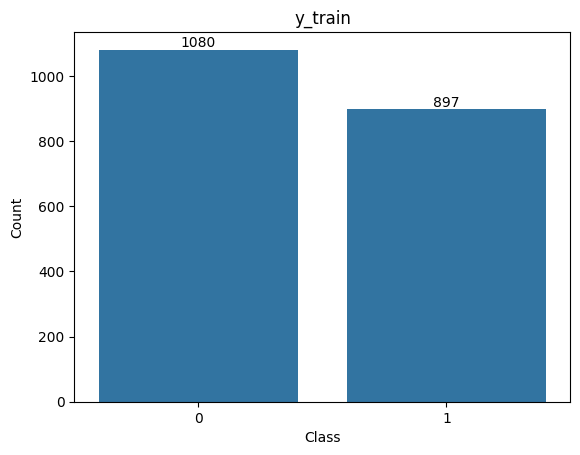

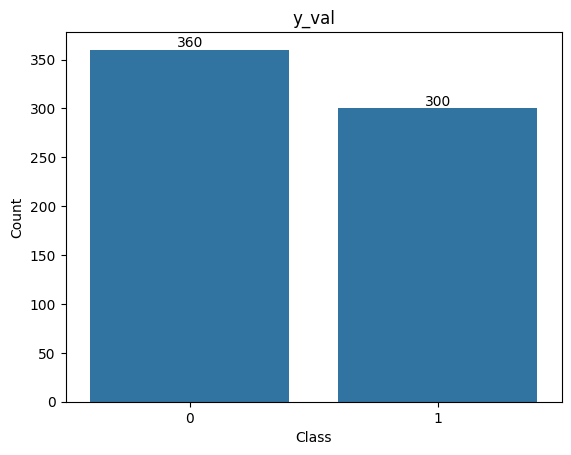

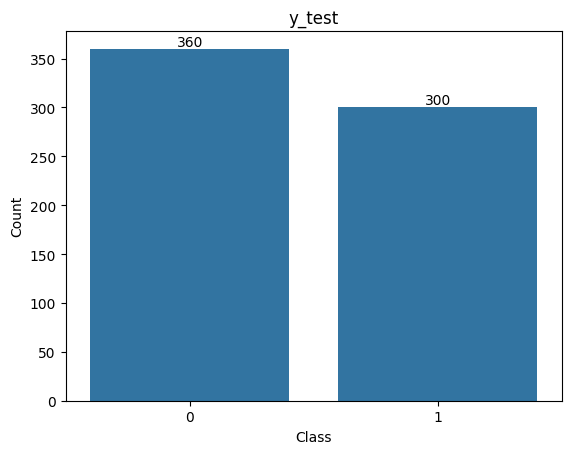

In [ ]:
# Plot class distribution
def plot_class_distribution(y, title):
    unique_values, value_counts = np.unique(y, return_counts=True)
    ax = sns.countplot(x=y)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(unique_values)
    plt.show()
    print()


plot_class_distribution(y_train, 'y_train')
plot_class_distribution(y_val, 'y_val')
plot_class_distribution(y_test, 'y_test')

### ResNet50 Model

In the next block of code, we will apply ResNet50-specific preprocessing to the images using from tensorflow.keras.applications.resnet import preprocess_input.

In [ ]:
# Preprocess images for ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

def preprocess(image, label):
    image = preprocess_input(image)
    return image, label


X_train, y_train = preprocess(X_train, y_train)
X_val, y_val = preprocess(X_val, y_val)
X_test, y_test = preprocess(X_test, y_test)

Here we are loading the weights of the ResNet50 pre-trained model

In [ ]:
# Build and compile the model
pretrained_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
pretrained_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In the below data augmentation layers are commented because during our experimentation phase whenever we used the data augmentation layer our model gave biased results.

In [ ]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 1)) # Input is 1 channel
# Duplicate the grayscale channel to create a 3 channel input for ResNet50
x = tf.keras.layers.Lambda(lambda x: tf.concat([x, x, x], axis=-1))(input_layer)


# data_augmentation_layer = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip('horizontal'),
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2),
#     tf.keras.layers.RandomBrightness(0.2)
# ], name='data_augmentation')

# da = data_augmentation_layer(x)
# x = pretrained_model(da, training=False)
x = pretrained_model(x, training=False)
bl = tf.keras.layers.BatchNormalization()(x)
flat = tf.keras.layers.Flatten()(bl)
drop = tf.keras.layers.Dropout(0.5)(flat)
dense = tf.keras.layers.Dense(512, activation='relu')(drop)
drop = tf.keras.layers.Dropout(0.5)(dense)
batch = tf.keras.layers.BatchNormalization()(drop)
dense = tf.keras.layers.Dense(32, activation='relu')(batch)
batch = tf.keras.layers.BatchNormalization()(dense)
# batch = tf.keras.layers.BatchNormalization()(flat)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(batch)

model_resnet50 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model_resnet50.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,663,617 (94.08 MB)

 Trainable params: 1,070,721 (4.08 MB)

 Non-trainable params: 23,592,896 (90.00 MB)

Here we compiling our model with optimizer, loss and metrces

In [ ]:
model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


This code snippet addresses the issue of class imbalance in the training data by calculating class weights. It uses the **compute_class_weight** function from scikit-learn with the **class_weight='balanced'** option. This automatically assigns higher weights to minority classes and lower weights to majority classes, helping the model learn more effectively from all classes. The calculated weights are then converted into a dictionary format for use during model training.

In [ ]:

# Calculate class weights
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))


Here, we are training the ResNet50 model using the fit method. We provide the training data (X_train, y_train), set the batch size to 32, and train for 50 epochs. We also use validation data (X_val, y_val) to monitor performance during training and apply class weights to handle class imbalance.

In [ ]:

# Train the model
history = model_resnet50.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    verbose=1
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 385ms/step - accuracy: 0.6792 - loss: 0.6657 - val_accuracy: 0.4530 - val_loss: 0.7853
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.7474 - loss: 0.5373 - val_accuracy: 0.4545 - val_loss: 1.0414
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.7421 - loss: 0.5155 - val_accuracy: 0.4545 - val_loss: 0.9093
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.7615 - loss: 0.5141 - val_accuracy: 0.4545 - val_loss: 0.8182
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.7590 - loss: 0.5118 - val_accuracy: 0.4576 - val_loss: 0.7741
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.7836 - loss: 0.4662 - val_accuracy: 0.4591 - val_loss: 0.6695
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.7772 - loss: 0.4630 - val_accuracy: 0.4788 - val_loss: 0.6786
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.7732 - loss: 0.4790 - val_accuracy

This plot shows the model performance during training.

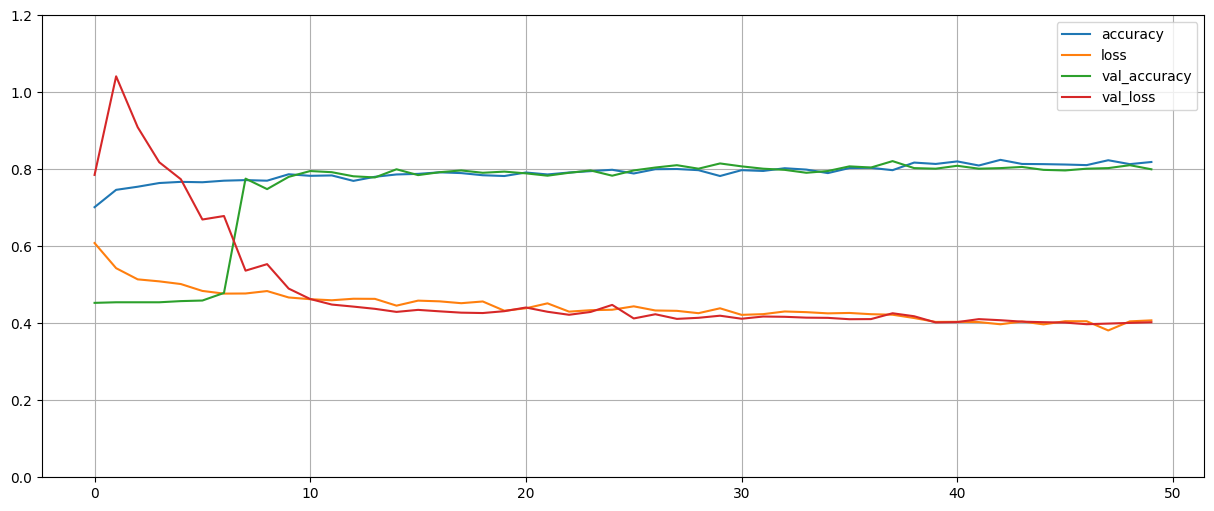

In [ ]:
# Plot training history
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.show()



Evaluation of model performance using unseen or test dataset

In [ ]:
# Evaluate the model
model_resnet50.evaluate(X_test, y_test)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7926 - loss: 0.4431


[0.42903244495391846, 0.789393961429596]

Here predicting for test data, converts the probabilities into class labels (0 or 1) using a threshold of 0.5 and prints classification report on test data using metrics like precision, recall, F1-score, and support, broken down by class.

In [ ]:

# Predict and evaluate
y_pred = model_resnet50.predict(X_test, verbose=1)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

class_labels = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=class_labels))


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step
              precision    recall  f1-score   support

      Benign       0.81      0.81      0.81       360
   Malignant       0.77      0.77      0.77       300

    accuracy                           0.79       660
   macro avg       0.79      0.79      0.79       660
weighted avg       0.79      0.79      0.79       660



Using confusion matrix to see that how many prediction are right and how many are wrongs.

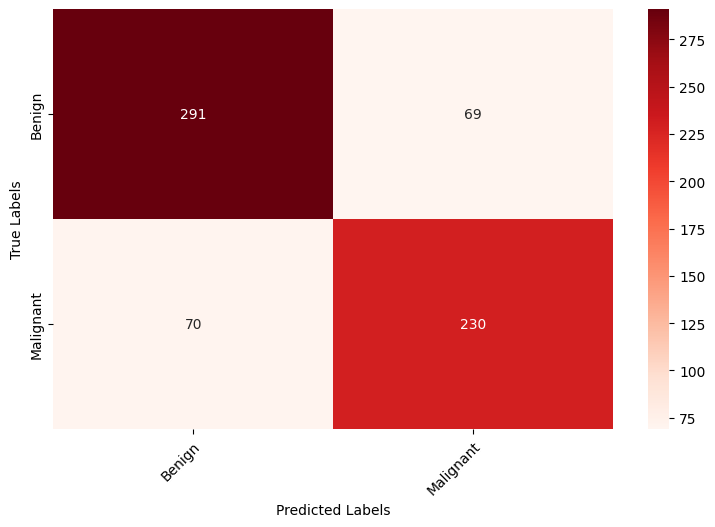

In [ ]:

# Plot confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
labels = list(class_labels)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Result

Overall our model performed well and achieved 79% accuracy. The performance can be further improved if we use another model or fine-tune model parameters.